<a href="https://colab.research.google.com/github/berthine/Deep_Learning/blob/master/AutoEncoder_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **AutoEncoders** 

Autoencoders are an unsupervised learning technique in which we leverage neural networks for the task of representation learning. Specifically, In this notbook we'll design a neural network architecture such that we impose a **bottleneck** in the network which **forces a compressed knowledge representation of the original input**.

**The bottleneck** is a key attribute of our network design; without the presence of an information bottleneck, our network could easily learn to simply memorize the input values by passing these values along through the network (visualized below).

A bottleneck constrains the amount of information that can traverse the full network, forcing a learned compression of the input data.

The steps:
* **Imports**


In [0]:
import numpy as np
import torch
from torchvision import datasets
import torchvision.transforms as transforms

* **Dowloads/split the MNIST dataset**

In [0]:
transform = transforms.ToTensor()
train_data =  datasets.MNIST(root='data', transform=transform, download=True, train=True)
test_data = datasets.MNIST(root='data', transform=transform, download=True, train=False)

* **Create a**  **Dataloader**

In [0]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=32)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=32)

* **Visualize the data**

In [31]:
train_iter = iter(train_loader)

imags,_= train_iter.next()
print(imags.shape)

torch.Size([32, 1, 28, 28])


* **Show Image**

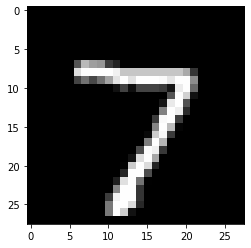

In [37]:
import matplotlib.pyplot as plt
 #define a data from the training
train_iter = iter(train_loader)
 #get one batch from the training data
images_, _ = train_iter.next()
 #get the first image and convert it to numpy

x= np.array(images_[0])
im = np.squeeze(np.array(images_[0]))
plt.imshow(im, cmap ='gray')

* Define model

In [53]:
import torch.nn as nn
import torch.nn.functional as F

class LinearModel(nn.Module):
  def __init__(self, input_size, bottle_neck_size):
    super(LinearModel, self).__init__()

#Encoder part
    self.fc1 = nn.Linear(input_size, bottle_neck_size)
    self.relu = nn.ReLU()

#Decoder part
    self.fc2 = nn.Linear(bottle_neck_size, input_size)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    #relu activation
    x = self.fc1(x)
    x = self.relu(x)
    #relu activation
    x = self.fc2(x)
    x= self.sigmoid(x)

    return x

model = LinearModel(28*28, 32)
print(model)

LinearModel(
  (fc1): Linear(in_features=784, out_features=32, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=32, out_features=784, bias=True)
  (sigmoid): Sigmoid()
)


* **Define the loss function/ optimizer**

In [54]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)
print(optimizer)

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.01
    momentum: 0
    nesterov: False
    weight_decay: 0
)


* **Training Loop**

In [55]:
n_epochs = 20
for i in range(n_epochs):
  train_loss = 0.0
  for data in train_loader:
    images, _ = data
    images = images.view(images.shape[0],-1)

    optimizer.zero_grad()
    outputs = model(images)

    loss = criterion(outputs, images)

    loss.backward()

    optimizer.step()

    train_loss +=loss.item()

  print('epoch: ',i, 'train_loss : ', train_loss)


epoch:  0 train_loss :  72.68161721527576
epoch:  1 train_loss :  72.4509519636631
epoch:  2 train_loss :  72.28599752485752
epoch:  3 train_loss :  72.14582481980324
epoch:  4 train_loss :  72.01218563318253
epoch:  5 train_loss :  71.87760150432587
epoch:  6 train_loss :  71.73732174932957
epoch:  7 train_loss :  71.58681444823742
epoch:  8 train_loss :  71.42253312468529
epoch:  9 train_loss :  71.24270342290401
epoch:  10 train_loss :  71.04730151593685
epoch:  11 train_loss :  70.83622169494629
epoch:  12 train_loss :  70.60661302506924
epoch:  13 train_loss :  70.35441219806671
epoch:  14 train_loss :  70.07519942522049
epoch:  15 train_loss :  69.7644314467907
epoch:  16 train_loss :  69.4174312800169
epoch:  17 train_loss :  69.02920730412006
epoch:  18 train_loss :  68.59452080726624
epoch:  19 train_loss :  68.10786972939968


**Plot the first ten input images and then reconstructed images**

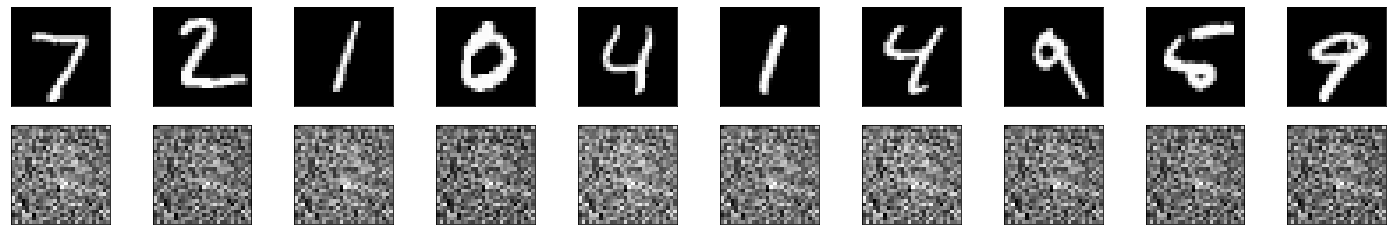

In [59]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()
batch_size = 32

images_flatten = images.view(images.size(0), -1)
# get sample outputs
output = model(images_flatten)
# prep images for display
images = images.numpy()

# output is resized into a batch of images
output = output.view(batch_size, 1, 28, 28)
# use detach when it's an output that requires_grad
output = output.detach().numpy()

# plot the first ten input images and then reconstructed images
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(25,4))

# input images on top row, reconstructions on bottom
for images, row in zip([images, output], axes):
    for img, ax in zip(images, row):
        ax.imshow(np.squeeze(img), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)